In [254]:
import geopandas
import pandas as pd
import numpy as np
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [255]:
us_map = geopandas.read_file('./tuto/gz_2010_us_040_00_5m.json')
us_map.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [256]:
type(us_map)

geopandas.geodataframe.GeoDataFrame

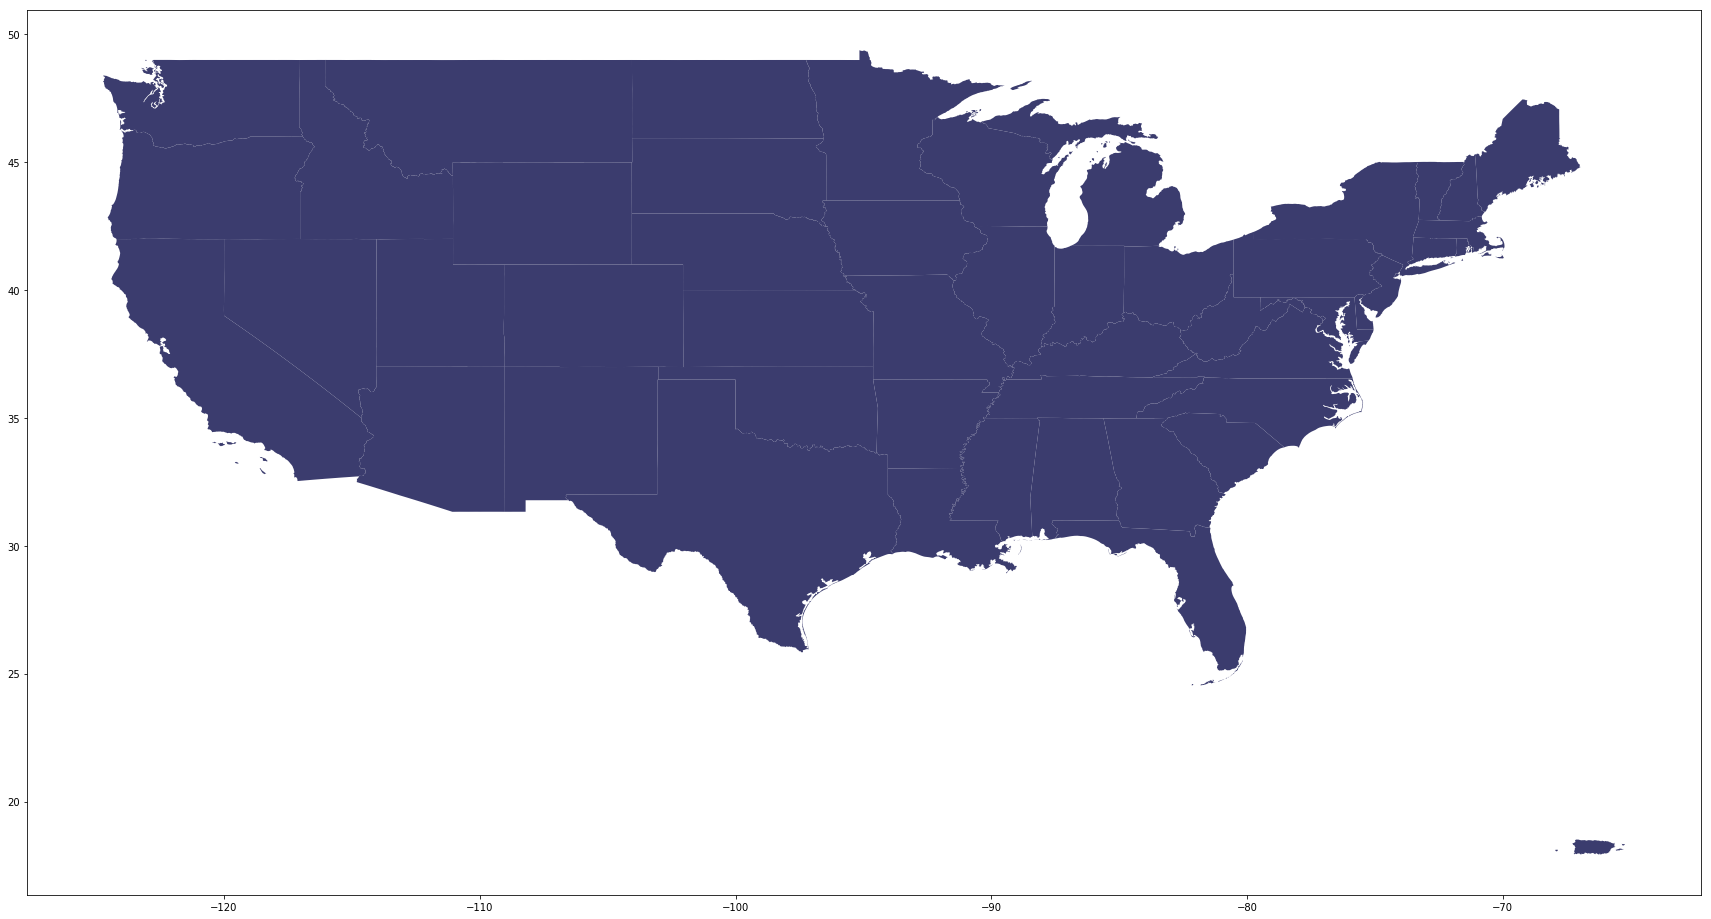

In [257]:
us_map[us_map['NAME'].isin(['Alaska','Hawaii'])==False].plot(figsize=(30,20), color='#3B3C6E')

In [258]:
#import data
data = pd.read_csv('./Storms/stormhistory.csv')
data.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
AdvisoryNumber    45 non-null object
Date              45 non-null object
Lat               45 non-null float64
Long              45 non-null float64
Wind              45 non-null int64
Pres              45 non-null int64
Movement          45 non-null object
Type              45 non-null object
Name              45 non-null object
Received          45 non-null object
Forecaster        45 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 3.9+ KB


In [260]:
data.isnull().sum()

AdvisoryNumber    0
Date              0
Lat               0
Long              0
Wind              0
Pres              0
Movement          0
Type              0
Name              0
Received          0
Forecaster        0
dtype: int64

In [261]:
#drop rows with missing values
data = data.dropna()

In [262]:
data.isnull().sum()

AdvisoryNumber    0
Date              0
Lat               0
Long              0
Wind              0
Pres              0
Movement          0
Type              0
Name              0
Received          0
Forecaster        0
dtype: int64

In [264]:
type(Michael)

pandas.core.frame.DataFrame

In [265]:
Michael = Michael.drop(['AdvisoryNumber','Forecaster','Received'], axis=1)

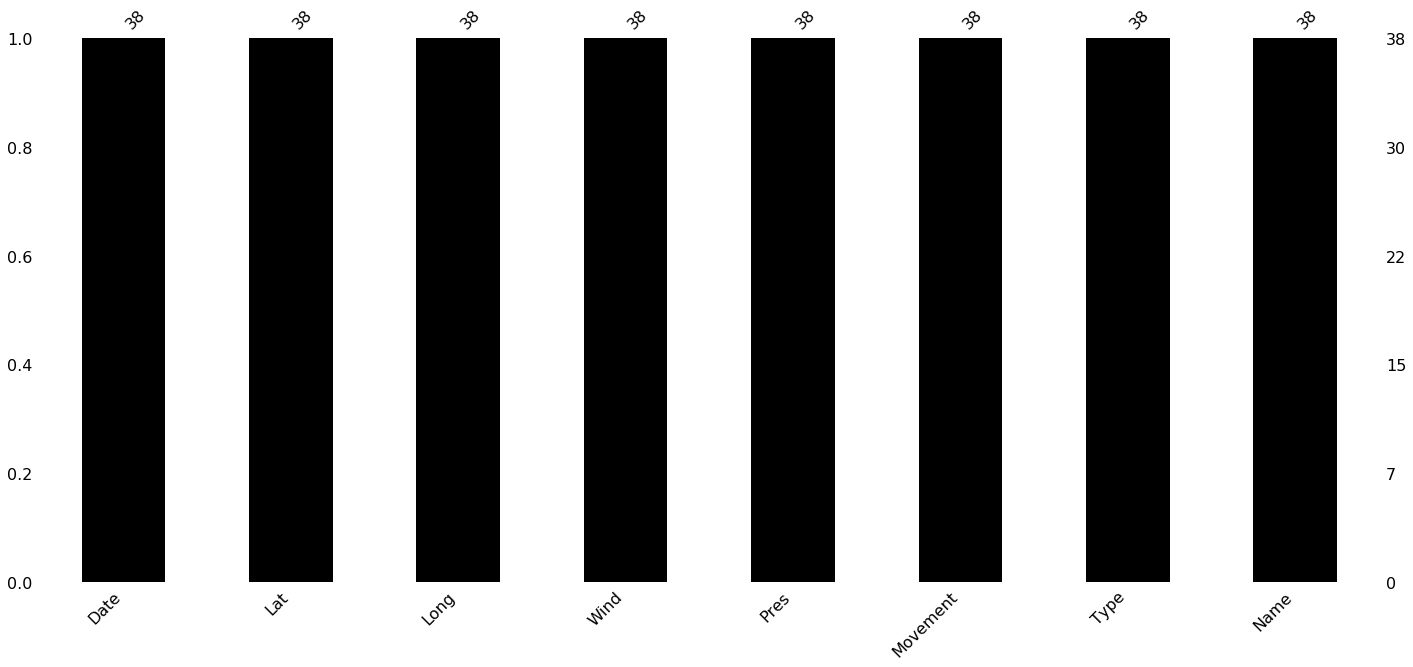

In [266]:
msn.bar(Michael, color='black')

In [280]:
Michael['Long'] = 0 - Michael['Long']
Michael.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
7,10/0,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,POINT (86.90000000000001 19.2)
8,10/0,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,POINT (85.5 19.2)
9,10/0,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,POINT (85.40000000000001 19.9)
10,10/0,20.0,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,POINT (85.40000000000001 20)
11,10/0,20.1,-85.5,60,994,N at 5 MPH (360 deg),Tropical Storm,Michael,POINT (85.5 20.1)


In [281]:
Michael['coordinates'] = Michael[['Long','Lat']].values.tolist()
Michael.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
7,10/0,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,"[-86.9, 19.2]"
8,10/0,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,"[-85.5, 19.2]"
9,10/0,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,"[-85.4, 19.9]"
10,10/0,20.0,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,"[-85.4, 20.0]"
11,10/0,20.1,-85.5,60,994,N at 5 MPH (360 deg),Tropical Storm,Michael,"[-85.5, 20.1]"


In [282]:
Michael['coordinates'] = Michael['coordinates'].apply(Point)
Michael.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
7,10/0,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,POINT (-86.90000000000001 19.2)
8,10/0,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,POINT (-85.5 19.2)
9,10/0,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,POINT (-85.40000000000001 19.9)
10,10/0,20.0,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,POINT (-85.40000000000001 20)
11,10/0,20.1,-85.5,60,994,N at 5 MPH (360 deg),Tropical Storm,Michael,POINT (-85.5 20.1)


In [283]:
Michael = geopandas.GeoDataFrame(Michael, geometry='coordinates')
Michael.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
7,10/0,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,POINT (-86.90000000000001 19.2)
8,10/0,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,POINT (-85.5 19.2)
9,10/0,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,POINT (-85.40000000000001 19.9)
10,10/0,20.0,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,POINT (-85.40000000000001 20)
11,10/0,20.1,-85.5,60,994,N at 5 MPH (360 deg),Tropical Storm,Michael,POINT (-85.5 20.1)


In [284]:
print("Mean wind speed {} mph\nMax wind speed {} mph".format(round(Michael.Wind.mean(),4),Michael.Wind.max()))

Mean wind speed 84.7368 mph
Max wind speed 155 mph


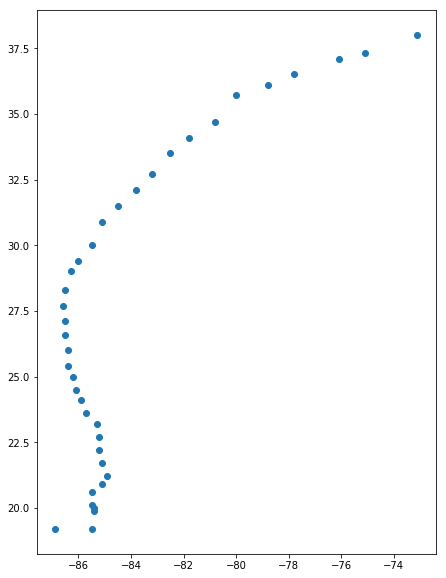

In [285]:
Michael.plot(figsize=(20,10))

Text(0.5, 1.0, 'Hurricane Michael in US MAP')

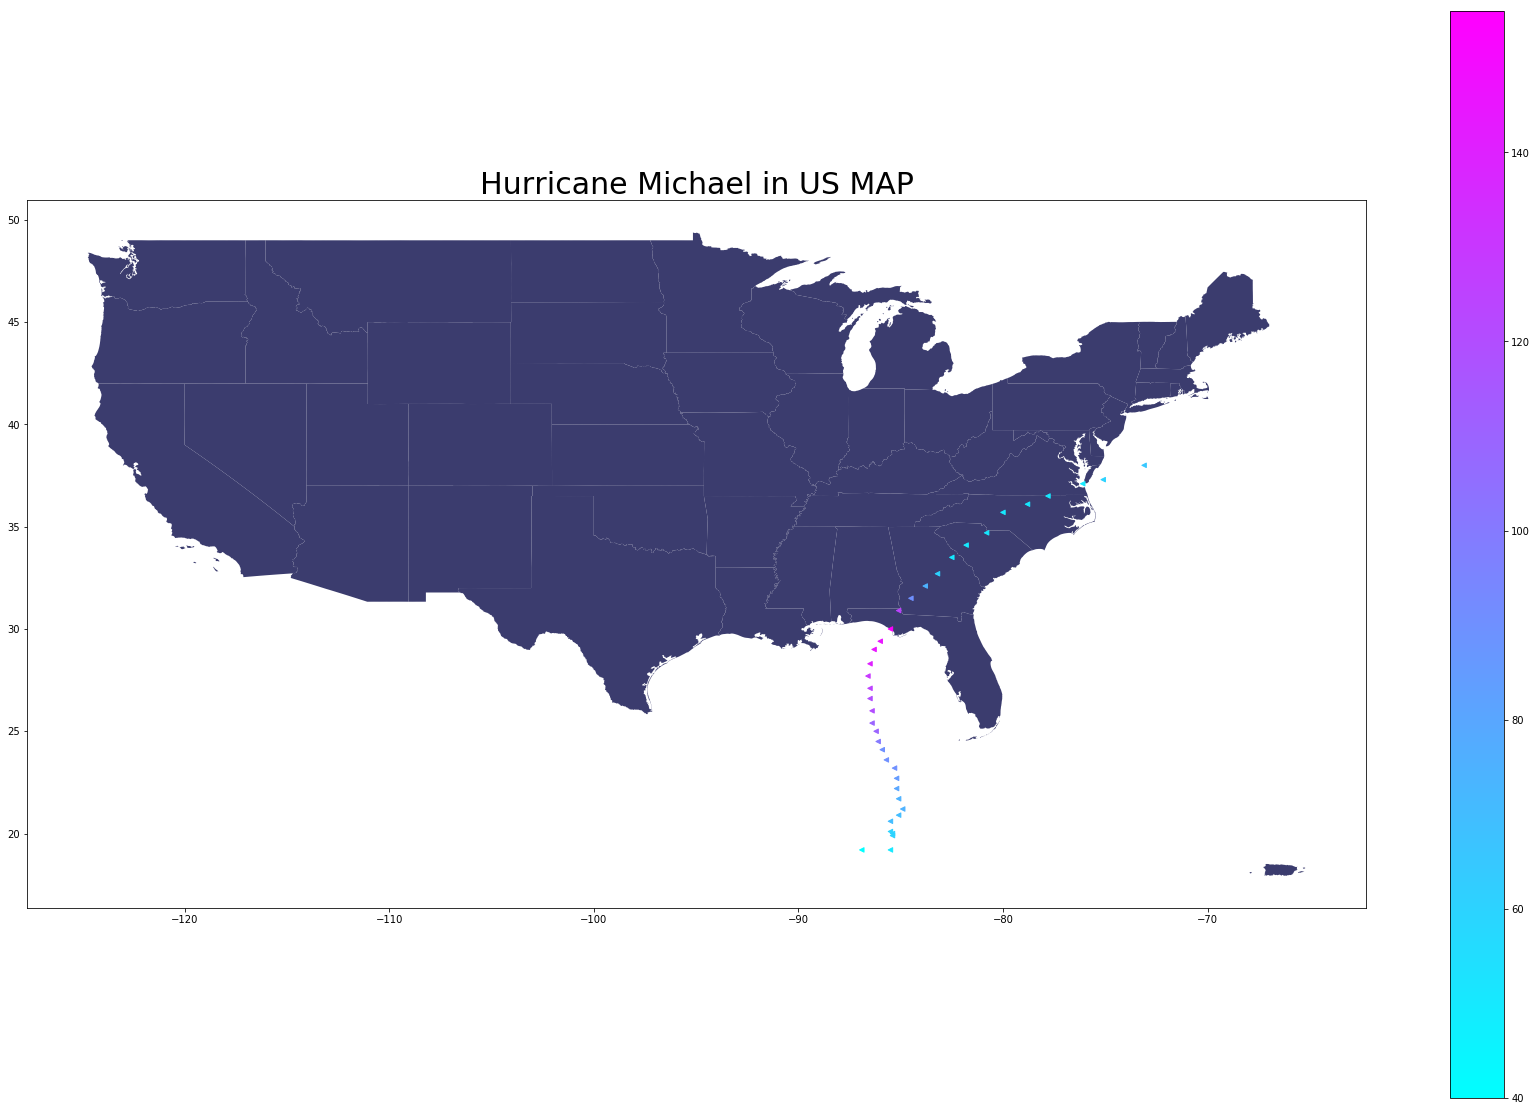

In [290]:
fig, ax = plt.subplots(1, figsize=(30,20))

base = us_map[us_map['NAME'].isin(['Alaska','Hawaii'])==False].plot(ax=ax,color='#3B3C6E')
Michael.plot(ax = base, column='Wind',marker='<', markersize=20, cmap='cool',  legend=True)
ax.set_title('Hurricane Michael in US MAP', fontsize = 30)